In [32]:
# 1.) What was the change in price of the stock over time?
# 2.) What was the daily return of the stock on average?
# 3.) What was the moving average of the various stocks?
# 4.) What was the correlation between different stocks'?
# 5.) How much value do we put at risk by investing in a particular stock?
# 6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

AAPL = []
GOOG = []
MSFT = []
AMZN = []

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for stock in company_list:
    stock = yf.download(stock, start, end)


for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)


[*********************100%%**********************]  0 of 0 completed


ValueError: No objects to concatenate

In [97]:
display(AAPL.head(10))
display(AAPL.tail(10))

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2014-08-20,25.110001,25.272499,24.987499,25.142500,22.324209,210796000,APPLE,NaN,NaN,NaN,NaN
2014-08-21,25.142500,25.235001,25.027500,25.145000,22.326426,133912000,APPLE,NaN,NaN,NaN,0.000099
2014-08-22,25.072500,25.367500,25.047501,25.330000,22.490692,176736000,APPLE,NaN,NaN,NaN,0.007357
2014-08-25,25.447500,25.542500,25.320000,25.385000,22.539526,161080000,APPLE,NaN,NaN,NaN,0.002171
2014-08-26,25.355000,25.375000,25.215000,25.222500,22.395239,132608000,APPLE,NaN,NaN,NaN,-0.006402
2014-08-27,25.254999,25.642500,25.174999,25.532499,22.670490,209476000,APPLE,NaN,NaN,NaN,0.012291
2014-08-28,25.397499,25.695000,25.389999,25.562500,22.697130,273840000,APPLE,NaN,NaN,NaN,0.001175
2014-08-29,25.715000,25.725000,25.549999,25.625000,22.752621,178380000,APPLE,NaN,NaN,NaN,0.002445
2014-09-02,25.764999,25.934999,25.680000,25.825001,22.930206,214256000,APPLE,NaN,NaN,NaN,0.007805


,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2024-08-07,206.899994,213.639999,206.389999,209.820007,209.577423,63516400,APPLE,215.661377,221.309837,213.523448,0.012498
2024-08-08,213.110001,214.199997,208.830002,213.309998,213.063385,47161100,APPLE,215.243860,220.597662,213.989309,0.016633
2024-08-09,212.100006,216.779999,211.970001,216.240005,215.990005,42201600,APPLE,215.072060,219.883489,214.507709,0.013736
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100,APPLE,215.026291,219.053539,215.036933,0.007130
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300,APPLE,215.298587,218.389613,215.621778,0.017193
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600,APPLE,215.288263,218.044844,216.180065,0.002034
2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000,APPLE,215.949509,218.084804,216.791959,0.013531
2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200,APPLE,216.593929,218.184771,217.400088,0.005918
2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40687800,APPLE,218.280122,218.294217,218.032785,-0.000708


In [34]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,88.741540,89.701768,87.845816,88.814865,86.726611,1.234924e+08
std,60.763781,61.430638,60.154755,60.823209,61.273466,7.174030e+07
min,22.500000,22.917500,22.367500,22.584999,20.720036,2.404830e+07
25%,33.917500,34.067501,33.775002,33.930000,31.593920,7.513510e+07
50%,55.237499,55.747501,54.482498,55.257500,52.936012,1.045320e+08
75%,147.479996,149.119995,145.880005,147.869995,145.696136,1.507120e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.593852e+08


In [35]:
AAPL.info()
display(company['company_name'].unique())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-08-20 to 2024-08-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Adj Close     2517 non-null   float64
 5   Volume        2517 non-null   int64  
 6   company_name  2517 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 157.3+ KB


array(['AMAZON'], dtype=object)

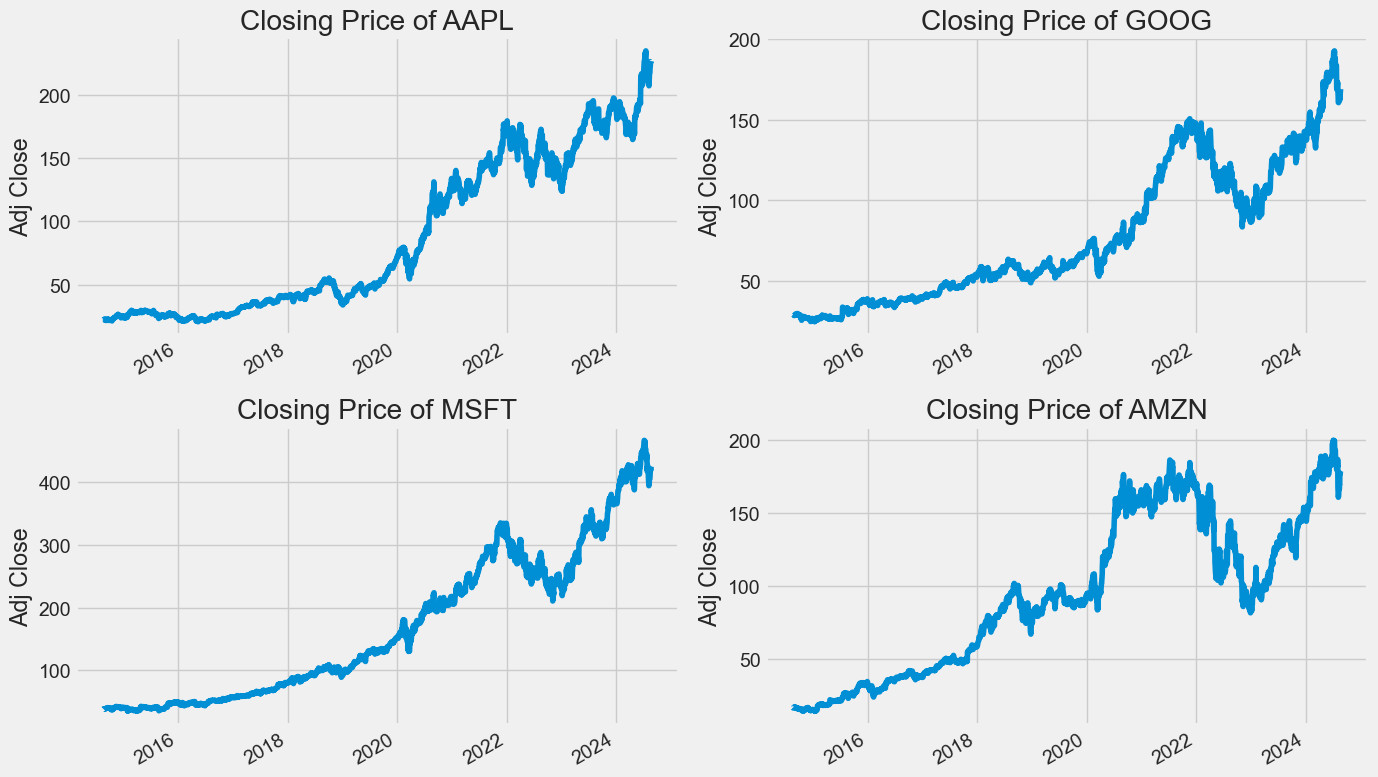

In [36]:
# Let's see a historical view of the closing price
plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

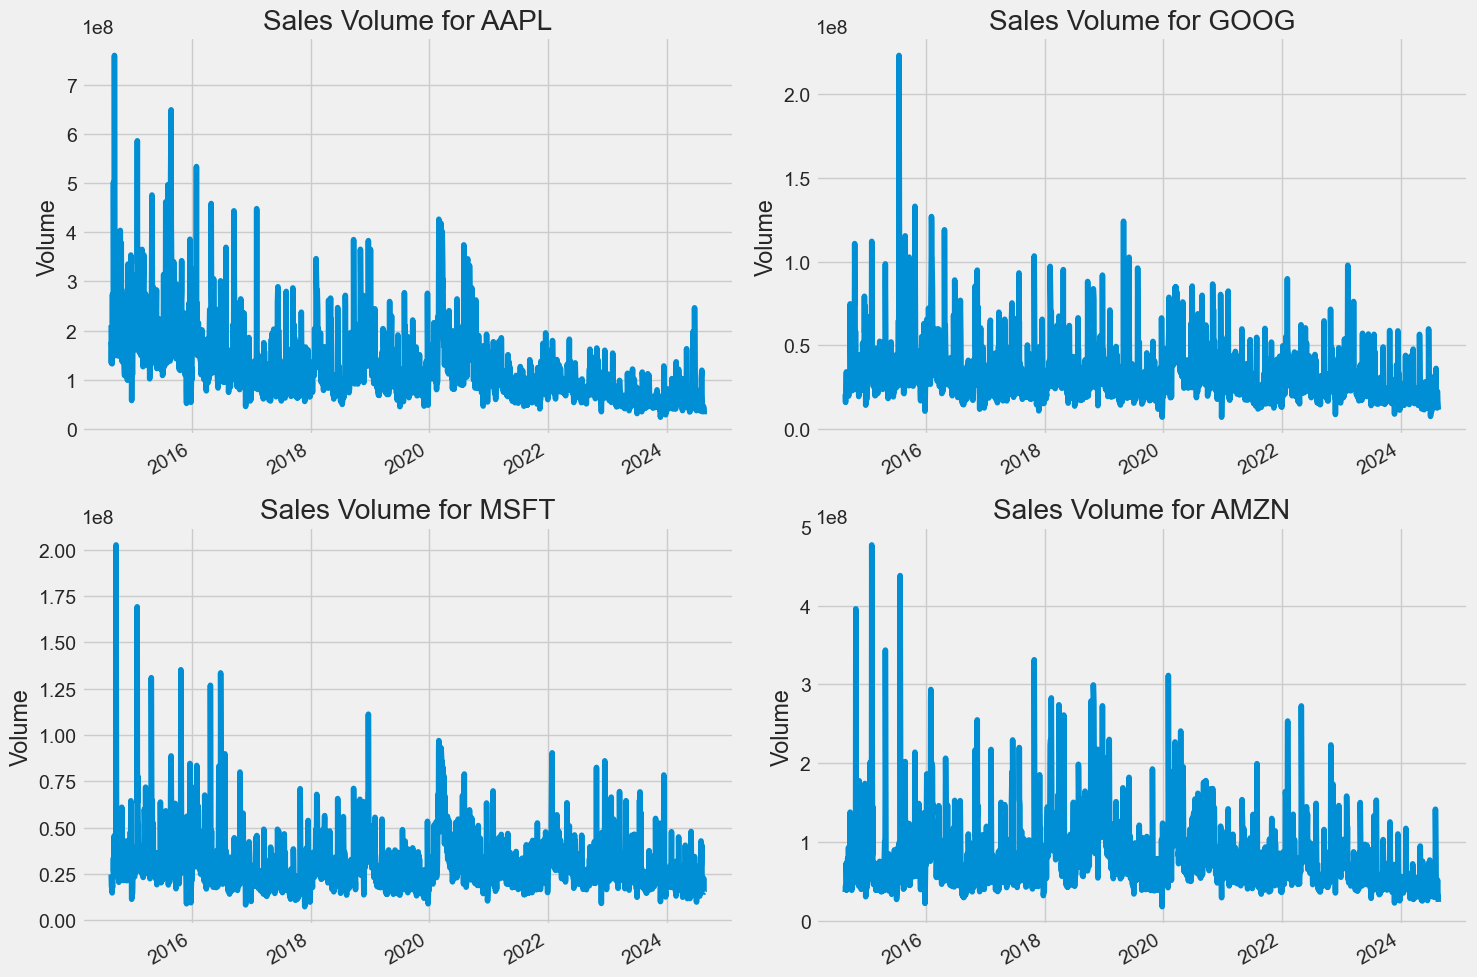

In [37]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

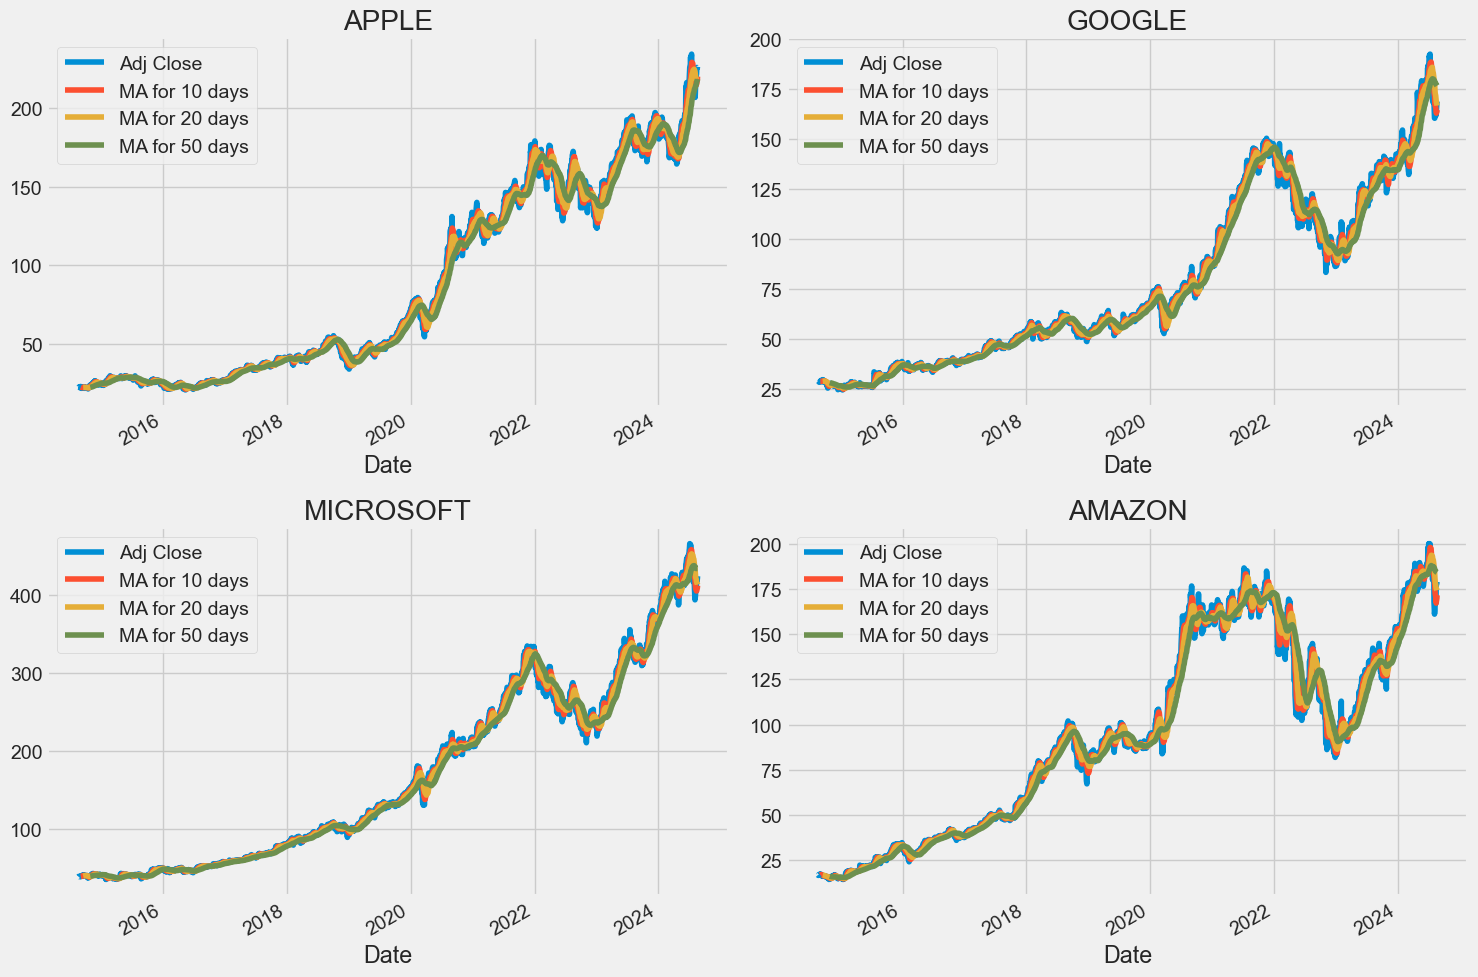

In [38]:
# Simple MA
# SMA, short for Simple Moving Average, calculates the average of a range of stock (closing) prices over a specific number of periods in that range. 
# The formula for SMA is:  ( SMA = P1 + P2 + .... Pn / N )
# where Pn = the stock price at time point n, N = the number of time points.

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# display(company.head(10))
# company.loc[np.isnan(company.loc[:, 'MA for 10 days']), 'MA for 10 days'] = company.loc[np.isnan(company.loc[:, 'MA for 10 days']), 'Adj Close']
# company.loc[np.isnan(company.loc[:, 'MA for 20 days']), 'MA for 20 days'] = company.loc[np.isnan(company.loc[:, 'MA for 20 days']), 'Adj Close']
# company.loc[np.isnan(company.loc[:, 'MA for 50 days']), 'MA for 50 days'] = company.loc[np.isnan(company.loc[:, 'MA for 50 days']), 'Adj Close']

# company['MA for 50 days'] = company['MA for 50 days'].astype(np.float64) 
# # display(company.loc[np.isnan(company.loc[:, 'MA for 50 days']), :])
# display(company.isnull().sum())

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

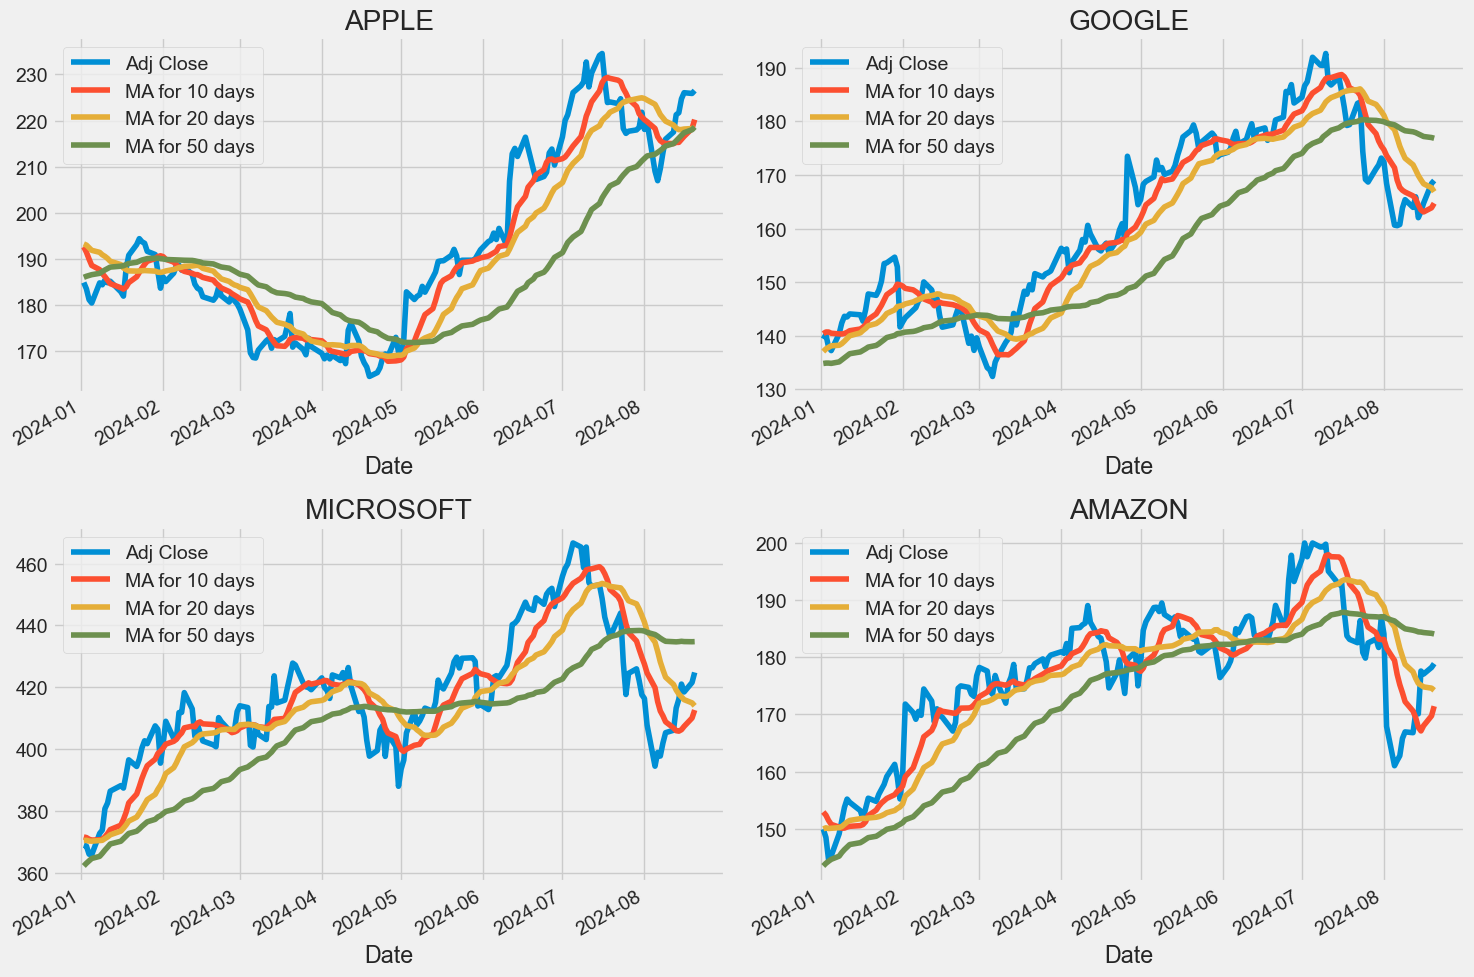

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL.loc['2024-01-01':, ['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG.loc['2024-01-01':,['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT.loc['2024-01-01':,['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN.loc['2024-01-01':,['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

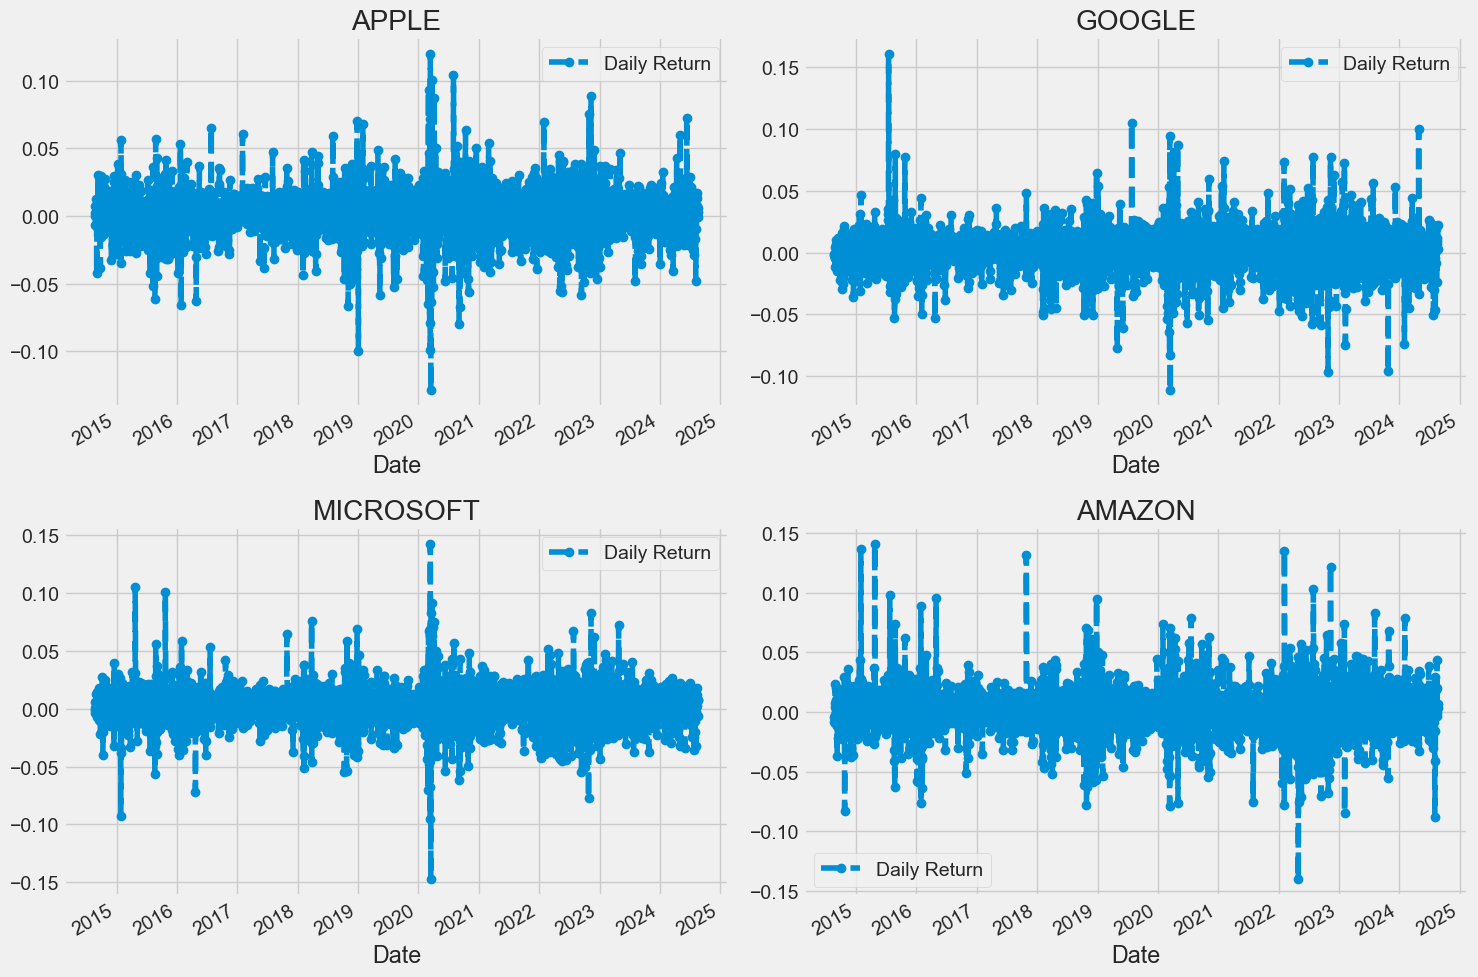

In [39]:
# 3. What was the daily return of the stock on average?

# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [40]:
AAPL['Daily Return'].unique()

array([            nan,  9.92796247e-05,  7.35749598e-03, ...,
        5.91848444e-03, -7.07824198e-04,  2.74467714e-03])

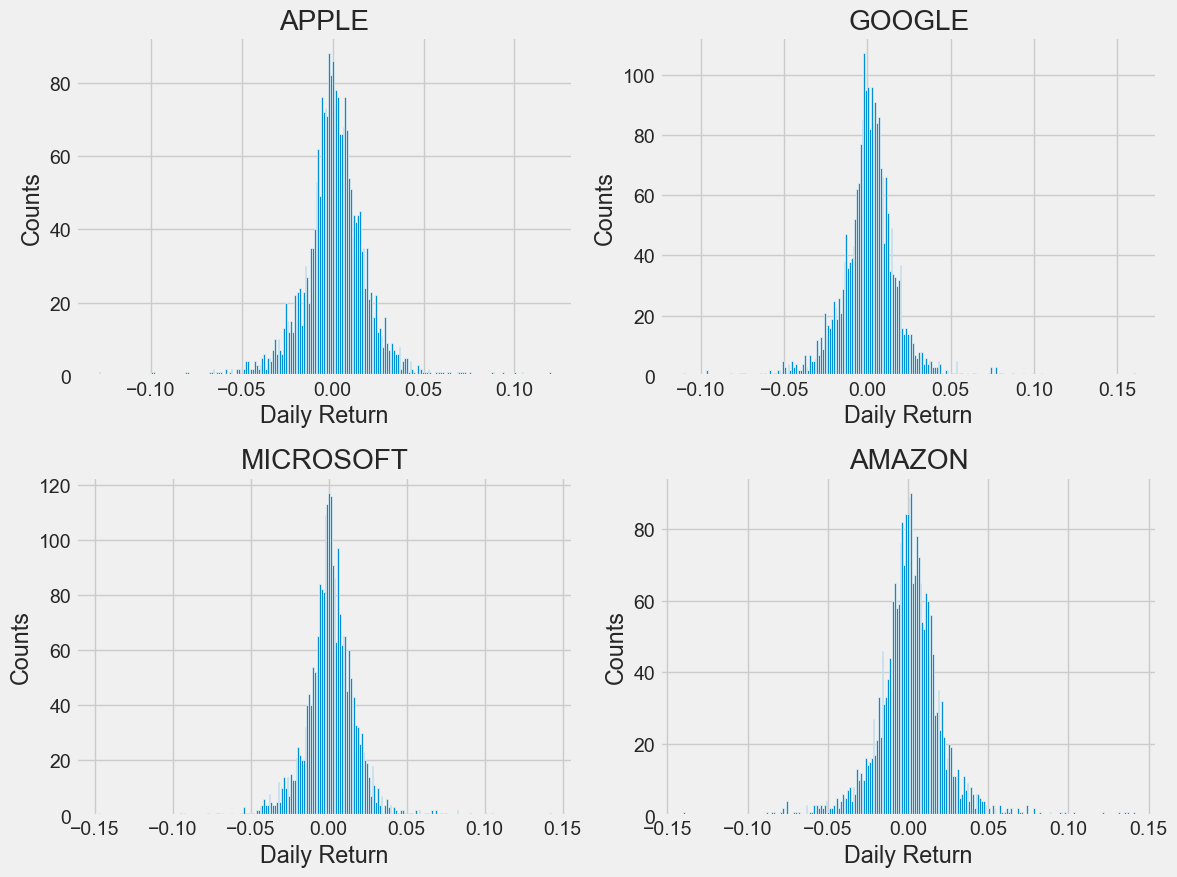

In [41]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=250)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [42]:
# 4. What was the correlation between different stocks closing prices?

# Grab all the closing prices for the tech stock list into one DataFrame
# closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)
# display(closing_df.head(10))

#closing_df = pd.DataFrame( index=pd.date_range(start, ( end - start).days , freq='D'))
closing_df = pd.DataFrame( index=AAPL.index)

for company, com_name in zip(company_list, tech_list):
        closing_df[str(com_name)] = company['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2014-08-20,NaN,NaN,NaN,NaN
2014-08-21,0.000099,-0.001916,0.006007,-0.008547
2014-08-22,0.007357,-0.001388,-0.001548,-0.003965
2014-08-25,0.002171,-0.004051,0.000443,0.007328
2014-08-26,-0.006402,-0.004033,-0.003542,0.023382


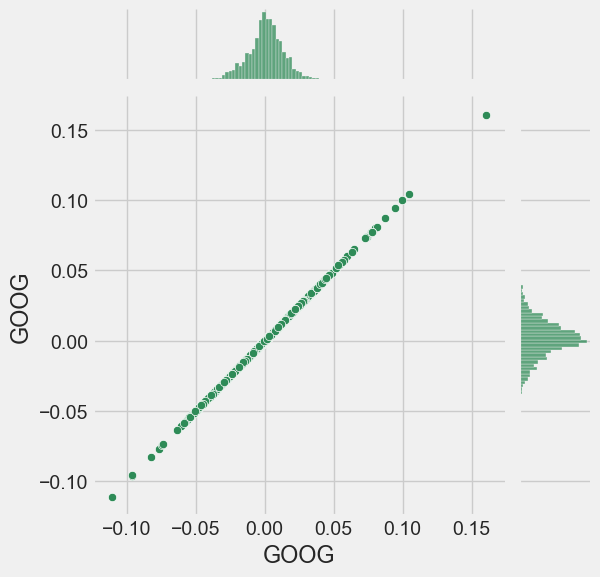

In [43]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

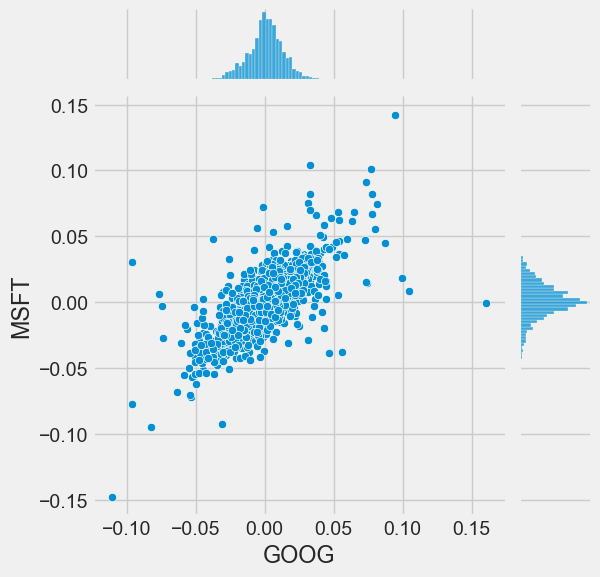

In [44]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

In [45]:
# So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.
# Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

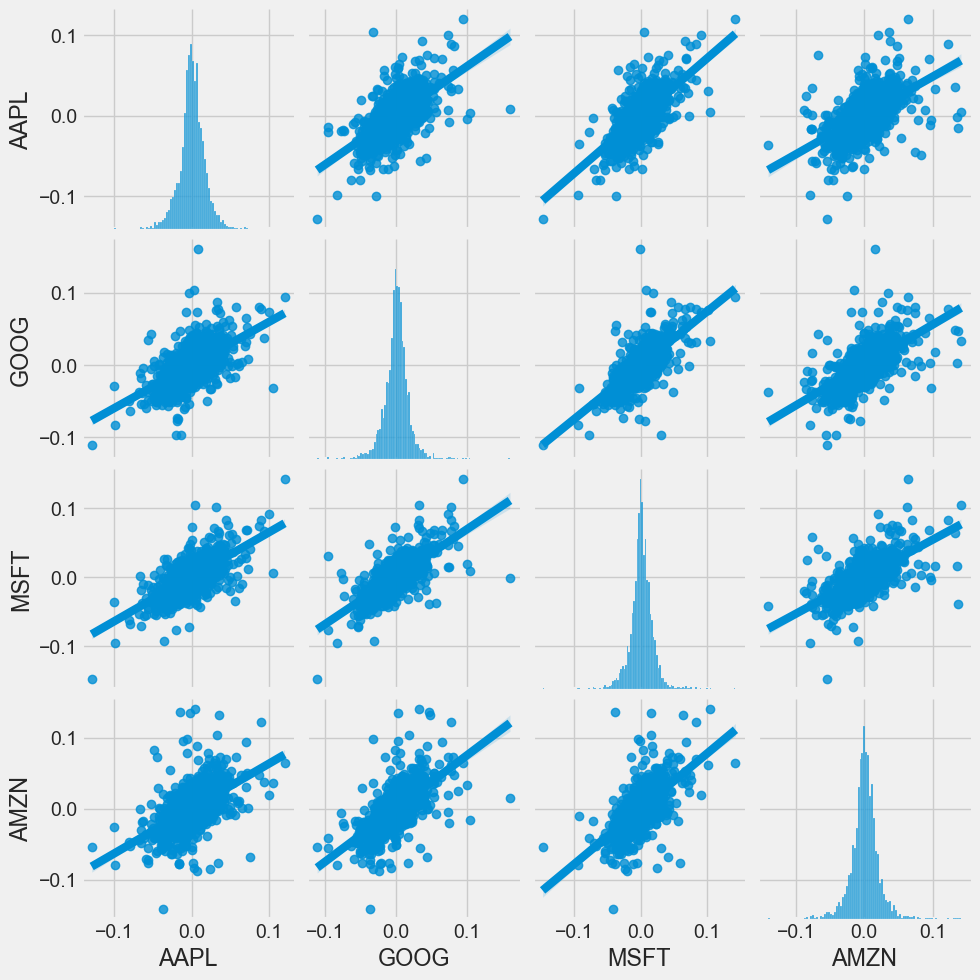

In [46]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

In [47]:
# Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns.
# It might be interesting to investigate that individual comaprison.

# While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.
# Below is an example of utilizing the full power of seaborn to achieve this result.

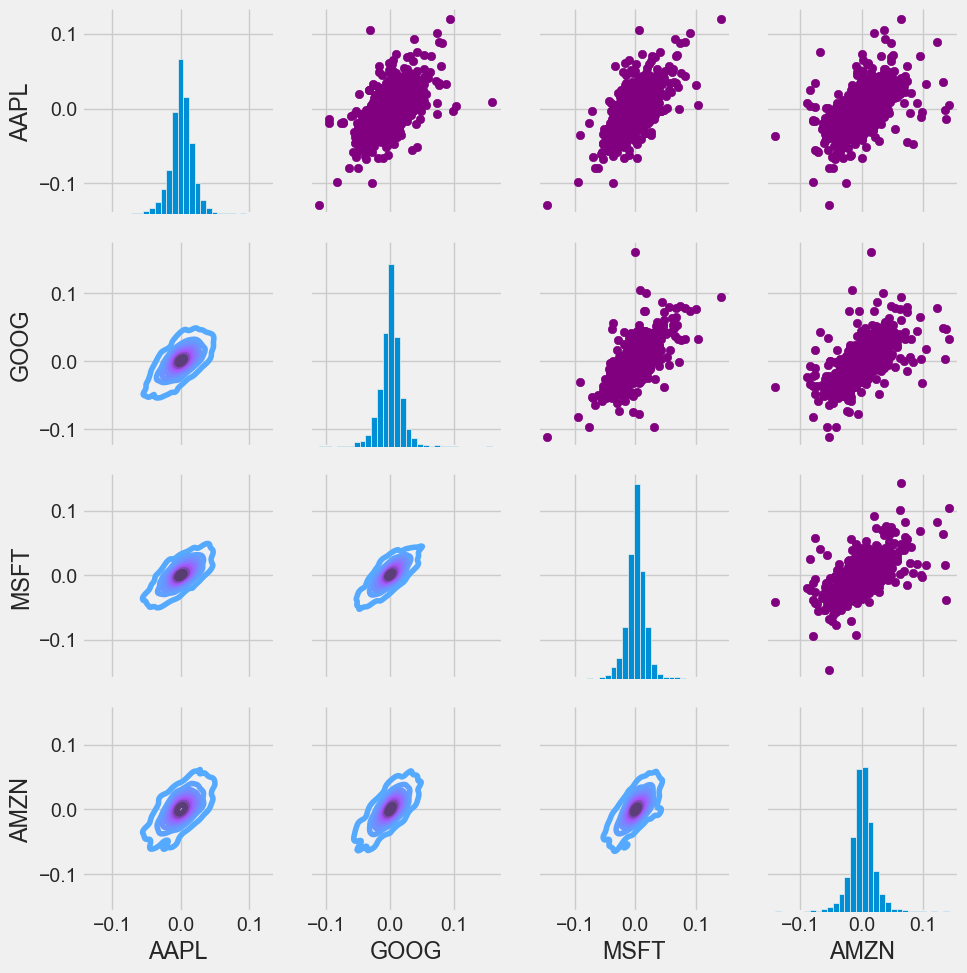

In [48]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

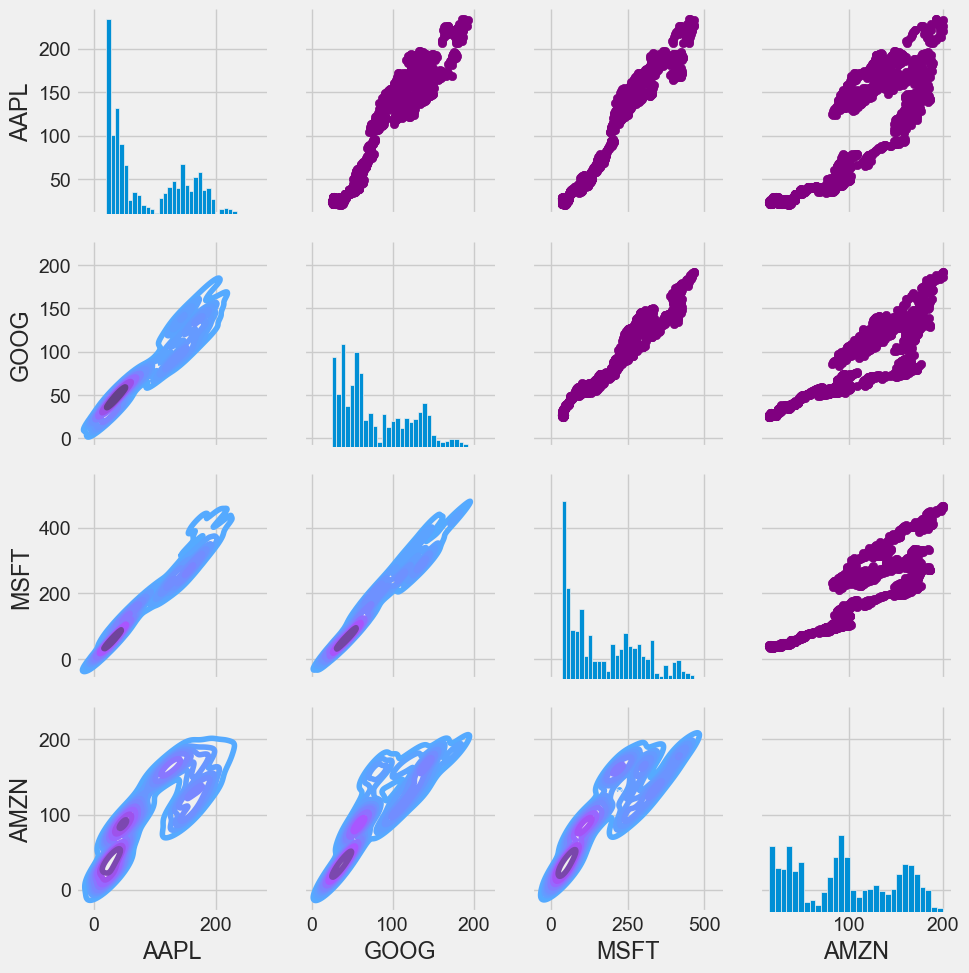

In [49]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [50]:
# Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.
# By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

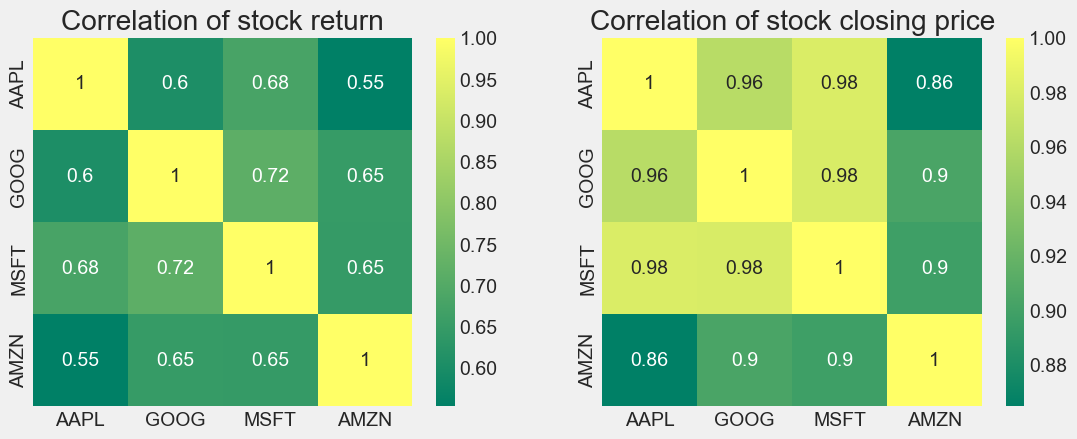

In [51]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [52]:
# Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return.
# It's also interesting to see that all the technology companies are positively correlated.

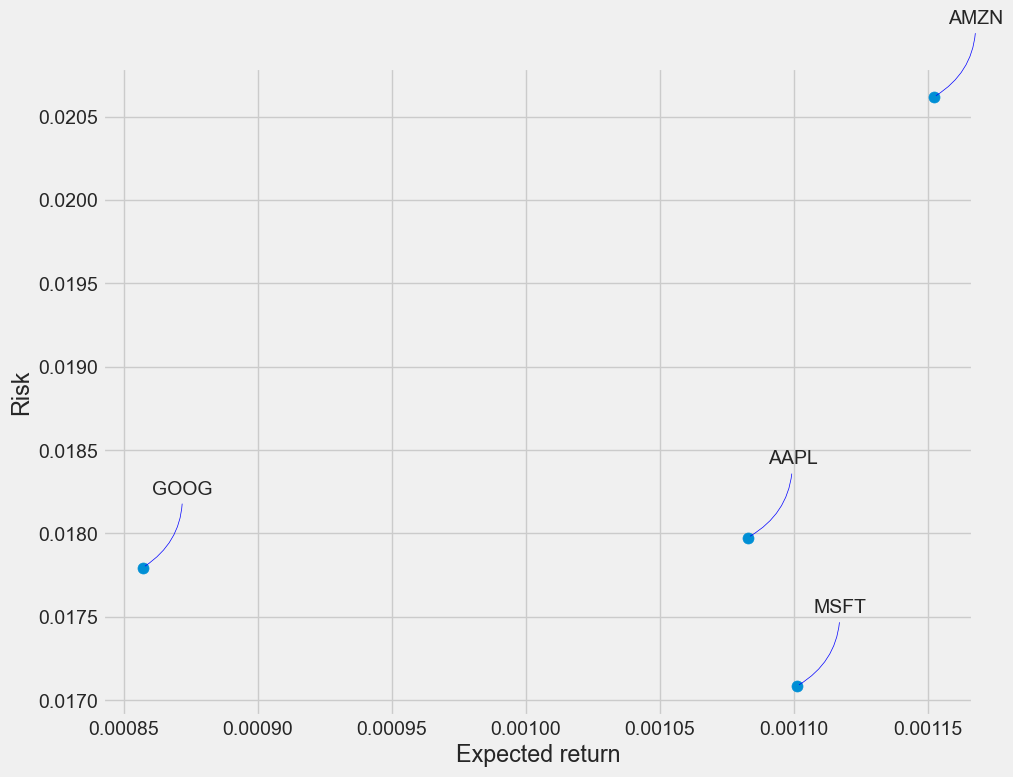

In [53]:
# 5. How much value do we put at risk by investing in a particular stock?

# There are many ways we can quantify risk, one of the most basic ways using the information 
# we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [54]:
# 6. Predicting the closing price stock price of APPLE inc:

# Get the stock quote
df = AAPL.copy()
# Show teh data
df

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2014-08-20,25.110001,25.272499,24.987499,25.142500,22.324209,210796000,APPLE,NaN,NaN,NaN,NaN
2014-08-21,25.142500,25.235001,25.027500,25.145000,22.326426,133912000,APPLE,NaN,NaN,NaN,0.000099
2014-08-22,25.072500,25.367500,25.047501,25.330000,22.490692,176736000,APPLE,NaN,NaN,NaN,0.007357
2014-08-25,25.447500,25.542500,25.320000,25.385000,22.539526,161080000,APPLE,NaN,NaN,NaN,0.002171
2014-08-26,25.355000,25.375000,25.215000,25.222500,22.395239,132608000,APPLE,NaN,NaN,NaN,-0.006402
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600,APPLE,215.288263,218.044844,216.180065,0.002034
2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000,APPLE,215.949509,218.084804,216.791959,0.013531
2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200,APPLE,216.593929,218.184771,217.400088,0.005918


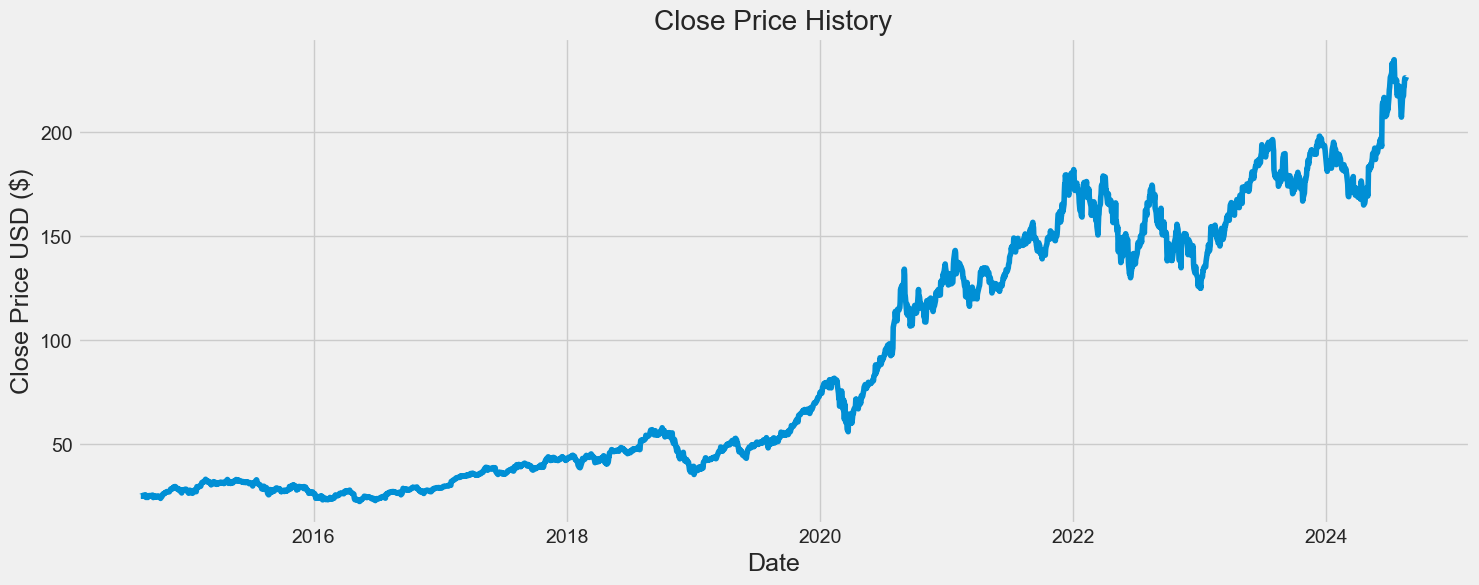

In [55]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [56]:
# Create a new dataframe with only the 'Close colum
data = df.filter(['Close'])

display(data)
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

,Close
Date,
2014-08-20,25.142500
2014-08-21,25.145000
2014-08-22,25.330000
2014-08-25,25.385000
2014-08-26,25.222500
...,...
2024-08-14,221.720001
2024-08-15,224.720001
2024-08-16,226.050003


2392

In [57]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01205033],
       [0.01206211],
       [0.01293378],
       ...,
       [0.95867786],
       [0.95792396],
       [0.96084523]])

In [58]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# x_train.shape

[array([0.01205033, 0.01206211, 0.01293378, 0.01319293, 0.01242727,
       0.01388791, 0.01402926, 0.01432375, 0.0152661 , 0.01013029,
       0.00916438, 0.01016562, 0.00944708, 0.00901124, 0.01255684,
       0.01306335, 0.01333428, 0.01329894, 0.01239193, 0.01324005,
       0.01348741, 0.01250972, 0.01262751, 0.01448866, 0.01344029,
       0.00886989, 0.01226235, 0.01150847, 0.01226235, 0.01041299,
       0.01126111, 0.01093129, 0.01093129, 0.00990648, 0.01232126,
       0.01258039, 0.0122388 , 0.01115509, 0.00990648, 0.00848117,
       0.00697341, 0.0086343 , 0.0110962 , 0.01428841, 0.01490094,
       0.01706835, 0.01752775, 0.01739817, 0.01931821, 0.02002497,
       0.01960092, 0.02080242, 0.02245153, 0.02150918, 0.02181544,
       0.02162697, 0.02199214, 0.02178011, 0.02280491, 0.02463072])]
[0.026480083968451168]

[array([0.01205033, 0.01206211, 0.01293378, 0.01319293, 0.01242727,
       0.01388791, 0.01402926, 0.01432375, 0.0152661 , 0.01013029,
       0.00916438, 0.01016562, 0.0

In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 77s 30ms/step - loss: 0.0012


In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
display(rmse)


4/4 [==============================] - 1s 21ms/step


9.107940829570035

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #, root_mean_squared_error

# Assuming y_test are the actual values and y_pred are the predicted values
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
#rmse = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}") # better close to 0
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 82.95458615494891
RMSE: 9.107940829570035
MAE: 7.463926025390625
R2: 0.8262760487839647


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35292\665616274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
Date,,
2024-02-22,184.369995,178.957596
2024-02-23,182.520004,178.793381
2024-02-26,181.160004,178.589172
2024-02-27,182.630005,178.228592
2024-02-28,181.419998,178.063873


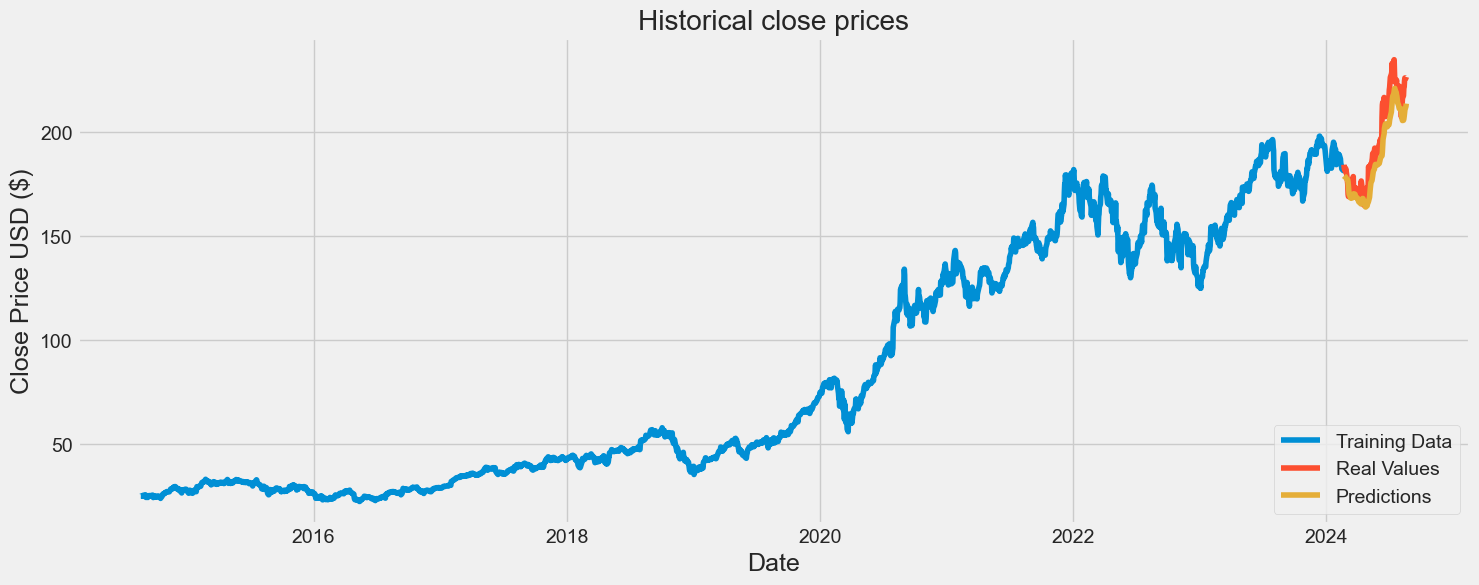

In [92]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
display(valid.head())


# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Historical close prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Data', 'Real Values', 'Predictions'], loc='lower right')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35292\1838465921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


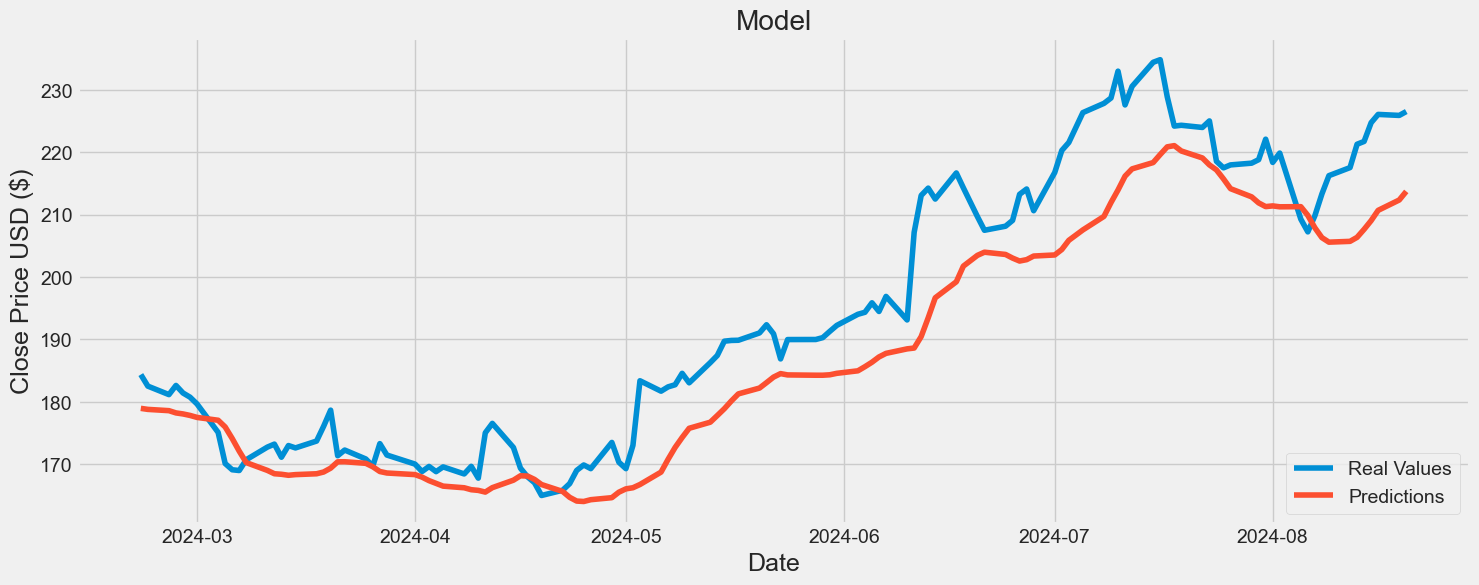

In [81]:
# Plot the data
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Real Values', 'Predictions'], loc='lower right')
plt.show()

In [100]:
# Show the valid and predicted prices
valid['Diff'] = abs(valid['Close'] - valid['Predictions'])
valid['Diff-Percentage'] = (abs(valid['Close'] - valid['Predictions']) * 100 ) / valid['Close']
display(valid.head(10))
display(valid.tail(10))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35292\3653300465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Diff'] = abs(valid['Close'] - valid['Predictions'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35292\3653300465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Diff-Percentage'] = (abs(valid['Close'] - valid['Predictions']) * 100 ) / valid['Close']


,Close,Predictions,Diff,Diff-Percentage
Date,,,,
2024-02-22,184.369995,178.957596,5.412399,2.935618
2024-02-23,182.520004,178.793381,3.726624,2.041762
2024-02-26,181.160004,178.589172,2.570831,1.419094
2024-02-27,182.630005,178.228592,4.401413,2.410016
2024-02-28,181.419998,178.063873,3.356125,1.849920
2024-02-29,180.750000,177.826141,2.923859,1.617626
2024-03-01,179.660004,177.507980,2.152023,1.197831
2024-03-04,175.100006,177.052231,1.952225,1.114920
2024-03-05,170.119995,175.977188,5.857193,3.442977


,Close,Predictions,Diff,Diff-Percentage
Date,,,,
2024-08-07,209.820007,207.887787,1.932220,0.920894
2024-08-08,213.309998,206.308380,7.001617,3.282367
2024-08-09,216.240005,205.583954,10.656052,4.927882
2024-08-12,217.529999,205.713654,11.816345,5.432053
2024-08-13,221.270004,206.354324,14.915680,6.740941
2024-08-14,221.720001,207.636642,14.083359,6.351867
2024-08-15,224.720001,209.031235,15.688766,6.981473
2024-08-16,226.050003,210.680420,15.369583,6.799196
2024-08-19,225.889999,212.340561,13.549438,5.998246
